In [7]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://nelms340/NTAD_Military_Bases_-1644289556481787667.csv') # load the data from s3
df.head() #show the top 5 rows


,OBJECTID,Country,Feature Description,Feature Name,Controlled Unclassified Information Indicator,Is FIRRMA Site,Is Joint Base,Media Identifier,Primary Key Identifier,Globally Unique Identifier,Site Name,Site Operational Status,Site Reporting Component Code,State Name Code,Shape__Area,Shape__Length
0,1,usa,na,Devens Reserve Forces Tng Area,no,no,no,na,,f9f35d60-b757-448a-9683-ebc2e518a310,Devens Reserve Forces Tng Area,act,usar,MA,0.002253,0.324854
1,2,usa,na,Fort Campbell,no,yes,no,na,,7dc7f20f-6983-4e95-a593-a3299fb37d9f,Fort Campbell,act,usa,TN,0.042675,1.388270
2,3,usa,na,NG Snake Creek TS Miramar,no,no,no,na,,e33df005-0713-4e64-8ebe-10dd700cbd60,NG Snake Creek TS Miramar,act,armyNationalGuard,FL,0.000116,0.046478
3,4,usa,na,Piñon Canyon Maneuver Site,no,yes,no,na,,0582f20a-d60a-4468-89e0-6fdade6f3e0c,Piñon Canyon Maneuver Site,act,usa,CO,0.097109,1.776971
4,5,usa,na,Stewart Annex,no,no,no,na,,0d629ab9-bead-4263-8d09-663887ea1100,Stewart Annex,act,usa,NY,0.000004,0.009891


In [8]:
df.shape

(728, 16)

##  in my data set, there are 720 rows and 16 columns.

## there are multiple columns, although the majority of them are text 

## my first impression of the data that a majority of the bases are in the United States, and there are many bases of very styles

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   OBJECTID                                       728 non-null    int64  
 1   Country                                        728 non-null    object 
 2   Feature Description                            728 non-null    object 
 3   Feature Name                                   728 non-null    object 
 4   Controlled Unclassified Information Indicator  728 non-null    object 
 5   Is FIRRMA Site                                 728 non-null    object 
 6   Is Joint Base                                  728 non-null    object 
 7   Media Identifier                               728 non-null    object 
 8   Primary Key Identifier                         728 non-null    object 
 9   Globally Unique Identifier                     665 non

In [10]:
df.describe()

,OBJECTID,Shape__Area,Shape__Length
count,728.000000,7.280000e+02,728.000000
mean,366.125000,1.410186e-02,0.386901
std,211.797442,8.242635e-02,0.951561
min,1.000000,2.937668e-10,0.000061
25%,182.750000,4.754900e-05,0.036802
50%,365.500000,2.658684e-04,0.104903
75%,549.250000,2.200033e-03,0.312400
max,734.000000,1.193397e+00,14.227086


In [11]:
df = df.rename(columns = {"Country" : "OCONUS?"})
df.head()

,OBJECTID,OCONUS?,Feature Description,Feature Name,Controlled Unclassified Information Indicator,Is FIRRMA Site,Is Joint Base,Media Identifier,Primary Key Identifier,Globally Unique Identifier,Site Name,Site Operational Status,Site Reporting Component Code,State Name Code,Shape__Area,Shape__Length
0,1,usa,na,Devens Reserve Forces Tng Area,no,no,no,na,,f9f35d60-b757-448a-9683-ebc2e518a310,Devens Reserve Forces Tng Area,act,usar,MA,0.002253,0.324854
1,2,usa,na,Fort Campbell,no,yes,no,na,,7dc7f20f-6983-4e95-a593-a3299fb37d9f,Fort Campbell,act,usa,TN,0.042675,1.388270
2,3,usa,na,NG Snake Creek TS Miramar,no,no,no,na,,e33df005-0713-4e64-8ebe-10dd700cbd60,NG Snake Creek TS Miramar,act,armyNationalGuard,FL,0.000116,0.046478
3,4,usa,na,Piñon Canyon Maneuver Site,no,yes,no,na,,0582f20a-d60a-4468-89e0-6fdade6f3e0c,Piñon Canyon Maneuver Site,act,usa,CO,0.097109,1.776971
4,5,usa,na,Stewart Annex,no,no,no,na,,0d629ab9-bead-4263-8d09-663887ea1100,Stewart Annex,act,usa,NY,0.000004,0.009891


## I just renamed the column country into OCONUS? This signifies whether the country is inside of the continental United States or not.

In [12]:
df.isnull().sum()

OBJECTID                                          0
OCONUS?                                           0
Feature Description                               0
Feature Name                                      0
Controlled Unclassified Information Indicator     0
Is FIRRMA Site                                    0
Is Joint Base                                     0
Media Identifier                                  0
Primary Key Identifier                            0
Globally Unique Identifier                       63
Site Name                                         0
Site Operational Status                           0
Site Reporting Component Code                     0
State Name Code                                   0
Shape__Area                                       0
Shape__Length                                     0
dtype: int64

## I was able to find a total of 63 values missing all in the primary key counter I decided to drop all of the missing values.

In [13]:
df = df.dropna() 
df.isnull().sum()

OBJECTID                                         0
OCONUS?                                          0
Feature Description                              0
Feature Name                                     0
Controlled Unclassified Information Indicator    0
Is FIRRMA Site                                   0
Is Joint Base                                    0
Media Identifier                                 0
Primary Key Identifier                           0
Globally Unique Identifier                       0
Site Name                                        0
Site Operational Status                          0
Site Reporting Component Code                    0
State Name Code                                  0
Shape__Area                                      0
Shape__Length                                    0
dtype: int64

In [14]:
df['Is Joint Base']

0      no
1      no
2      no
3      no
4      no
       ..
720    no
721    no
722    no
724    no
725    no
Name: Is Joint Base, Length: 665, dtype: object

In [15]:
df[5:10]

,OBJECTID,OCONUS?,Feature Description,Feature Name,Controlled Unclassified Information Indicator,Is FIRRMA Site,Is Joint Base,Media Identifier,Primary Key Identifier,Globally Unique Identifier,Site Name,Site Operational Status,Site Reporting Component Code,State Name Code,Shape__Area,Shape__Length
5,6,usa,na,NG Sandson AASF,no,no,no,na,,fd6498b4-9e6a-4547-8a64-a3d329b02f88,NG Sandson AASF,act,armyNationalGuard,VA,0.000038,0.027966
6,7,usa,na,NG AASF02 Birmingham,no,no,no,na,,798d2939-75f9-40b5-a14d-62658e117737,NG AASF02 Birmingham,act,armyNationalGuard,AL,0.000009,0.012057
7,8,usa,na,Aliamanu Military Reservation,no,no,no,na,,f573a5d2-2916-404e-b39b-b50b77e9a658,Aliamanu Military Reservation,act,usa,HI,0.000214,0.094322
8,9,usa,na,Allen Stagefield AL,no,no,no,na,,2a89f870-a3c3-47fe-bd42-c391fd11f473,Allen Stagefield AL,act,usa,AL,0.000043,0.026601
9,10,usa,na,Anniston Army Depot,no,yes,no,na,,e0622832-7263-4b42-a25e-371e105a8f36,Anniston Army Depot,act,usa,AL,0.006152,0.450616


In [16]:
df = df[(df['Is Joint Base']!="no") ] #filter data
df.describe()

,OBJECTID,Shape__Area,Shape__Length
count,14.000000,14.000000,14.000000
mean,523.785714,0.023906,1.340677
std,193.722315,0.054748,1.424094
min,100.000000,0.000160,0.108727
25%,362.500000,0.002057,0.440996
50%,667.500000,0.006367,0.982754
75%,670.750000,0.014772,1.795106
max,689.000000,0.208913,5.570092


## I attempted to determine whether a base was a joint base or not. The results show the all of the bases were not joint. This shows that all of the services have their own base for their own purposes, not sharing money

<Axes: xlabel='Is Joint Base'>

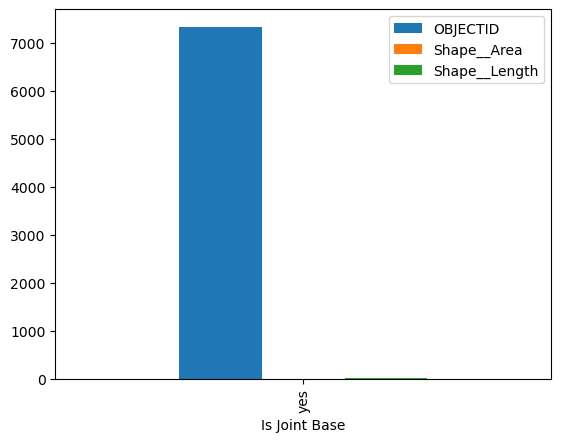

In [36]:
Some_of_joint_basis = df.groupby('Is Joint Base').sum()
Some_of_joint_basis.plot.bar()

## this is a fairly basic plot, although it illustrates a key point with great visualization. On this list, there are no joint basis, showing a lack of interoperability between the services. If the services aren't working together, then there are a problem.

<Axes: xlabel='Site Reporting Component Code'>

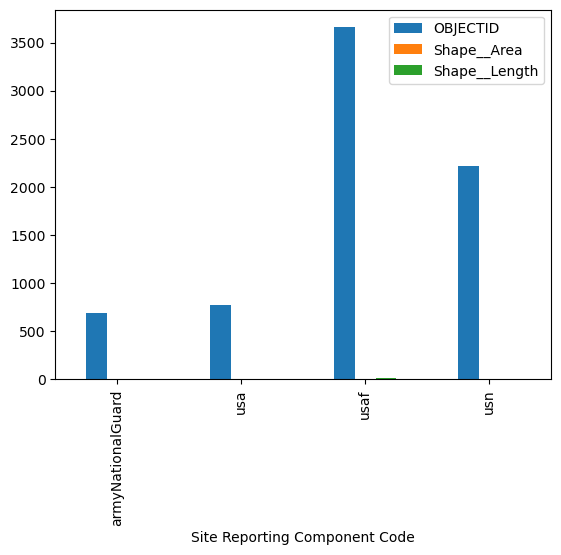

In [37]:
Is_FIRRMA_Site = df.groupby('Site Reporting Component Code').sum()  
Is_FIRRMA_Site.plot.bar()

## This shows the makeup of who occupies all the bases on the list. We can see that the United States Air Force holds the most, showing that the United States prioritizes a strong Air Force. We can also consider the United States Navy, which ranks second, indicating that the US values its navy and maintains a large fleet.